## Mini Project 2

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer




Load given datasets

In [2]:
original_train=pd.read_csv("Consumer_Complaints_train.csv")
original_test=pd.read_csv("Consumer_Complaints_test.csv")
# test=pd.read_csv("Consumer_Complaints_test.csv")

# consumer_train.head()

consumer_train=original_train
consumer_test=original_test

In [3]:
consumer_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of train dataset

In [4]:
print("train\n")
print(consumer_train.head())


train

  Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough 

Print top 5 records of test dataset

In [5]:
print("\ntest\n")
print(consumer_test.head())



test

  Date received          Product                            Sub-product  \
0    2015-01-17      Credit card                                    NaN   
1    2016-06-22    Consumer Loan                             Title loan   
2    2015-09-04      Credit card                                    NaN   
3    2016-05-17    Consumer Loan                       Installment loan   
4    2016-07-07  Debt collection  Other (i.e. phone, health club, etc.)   

                                   Issue  \
0  Customer service / Customer relations   
1           Payment to acct not credited   
2          Credit line increase/decrease   
3    Problems when you are unable to pay   
4    Improper contact or sharing of info   

                               Sub-issue  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4  Contacted employer after asked not to   

            

**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [6]:
print("Train: ",consumer_train.shape)
print("Test :" , consumer_test.shape)

Train:  (358810, 18)
Test : (119606, 17)


Print columns of train and test datasets

In [7]:
print("Columns of train dataset :" , consumer_train.columns)
print("\nColumns of test dataset :" , consumer_test.columns)


Columns of train dataset : Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Columns of test dataset : Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [8]:
print("Train :\n",consumer_train.dtypes)
print("\n")
print("Test :\n", consumer_test.dtypes)

Train :
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


Test :
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response        

Print missing values in percentage

In [9]:
missing_train=pd.DataFrame({"Count": consumer_train.isnull().sum(),"Percentage":(consumer_train.isnull().sum()/len(consumer_train))*100})
print("missing Values in Train dataset:\n\n",missing_train)
missing_test=pd.DataFrame({"Count": consumer_test.isnull().sum(),"Percentage":(consumer_test.isnull().sum()/len(consumer_test))*100})
print("\nmissing Values in Test dataset:\n\n",missing_test)


missing Values in Train dataset:

                                Count  Percentage
Date received                      0    0.000000
Product                            0    0.000000
Sub-product                   103786   28.925058
Issue                              0    0.000000
Sub-issue                     219374   61.139322
Consumer complaint narrative  302630   84.342688
Company public response       290879   81.067696
Company                            0    0.000000
State                           2903    0.809063
ZIP code                        2911    0.811293
Tags                          308584   86.002062
Consumer consent provided?    257230   71.689752
Submitted via                      0    0.000000
Date sent to company               0    0.000000
Company response to consumer       0    0.000000
Timely response?                   0    0.000000
Consumer disputed?                 0    0.000000
Complaint ID                       0    0.000000

missing Values in Test dataset:



Drop columns where more than 25% of the data are missing.

In [10]:
threshold=0.25
missing_columns_train=consumer_train.isnull().mean()
selected_columns=consumer_train.columns[missing_columns_train>threshold]
consumer_train.drop(selected_columns,axis=1,inplace=True)

missing_columns_test=consumer_test.isnull().mean()
selected_columns_test=consumer_test.columns[missing_columns_test>threshold]
consumer_test.drop(selected_columns_test,axis=1,inplace=True)

print(consumer_train.head())
print("\n")
print(consumer_test.head())
consumer_test.isnull().mean()

  Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                                     Company State ZIP code Submitted via  \
0                                    Equifax    GA    30134           Web   
1                      Wells Fargo & Company    GA    319XX           Web   
2                                   Citibank    SC    29203         Phone   
3       FAIR COLLECTIONS & OUTSOURCING, INC.    OH    43082      Referral   
4  HCFS Health Care Financial Services, Inc.    CA    90036           Web   

 

Date received                   0.000000
Product                         0.000000
Issue                           0.000000
Company                         0.000000
State                           0.007826
ZIP code                        0.007834
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Complaint ID                    0.000000
dtype: float64

In [11]:
consumer_train.isnull().any()

Date received                   False
Product                         False
Issue                           False
Company                         False
State                            True
ZIP code                         True
Submitted via                   False
Date sent to company            False
Company response to consumer    False
Timely response?                False
Consumer disputed?              False
Complaint ID                    False
dtype: bool

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [12]:
from datetime import datetime
year=[]
month=[]
day=[]
for date in consumer_train['Date received']:
    year.append(date.split("-")[0])
    month.append(date.split("-")[1])
    day.append(date.split("-")[2])
consumer_train['Day']=pd.DataFrame(day)
consumer_train['Month']=pd.DataFrame(month)
consumer_train['Year']=pd.DataFrame(year)

year_test=[]
month_test=[]
day_test=[]

for date in consumer_test['Date received']:
    year_test.append(date.split("-")[0])
    month_test.append(date.split("-")[1])
    day_test.append(date.split("-")[2])
consumer_test['Day']=pd.DataFrame(day_test)
consumer_test['Month']=pd.DataFrame(month_test)
consumer_test['Year']=pd.DataFrame(year_test)



Convert dates from object type to datetime type

In [13]:
consumer_train['Date received']=pd.to_datetime(consumer_train['Date received'],dayfirst=True)
print("consumer_train:\n \n",consumer_train['Date received'].head())
print("\n")
consumer_test['Date received']=pd.to_datetime(consumer_test['Date received'],dayfirst=True)
print("\n consumer_test : \n\n",consumer_test['Date received'].head())

C:\Users\DELL\AppData\Local\Temp\ipykernel_8428\1219001420.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  consumer_train['Date received']=pd.to_datetime(consumer_train['Date received'],dayfirst=True)


consumer_train:
 
 0   2015-10-14
1   2015-04-26
2   2013-12-20
3   2016-03-03
4   2015-01-30
Name: Date received, dtype: datetime64[ns]



 consumer_test : 

 0   2015-01-17
1   2016-06-22
2   2015-09-04
3   2016-05-17
4   2016-07-07
Name: Date received, dtype: datetime64[ns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_8428\1219001420.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  consumer_test['Date received']=pd.to_datetime(consumer_test['Date received'],dayfirst=True)


In [14]:
consumer_train['Day']=pd.to_datetime(consumer_train['Day'],format="%d")
consumer_train['Day']=consumer_train['Day'].dt.day
consumer_train['Day'].head()

0    14
1    26
2    20
3     3
4    30
Name: Day, dtype: int32

In [15]:
consumer_train['Month']=pd.to_datetime(consumer_train['Month'],format="%m")
consumer_train['Month']=consumer_train['Month'].dt.month
consumer_train['Year']=pd.to_datetime(consumer_train['Year'],format="%Y")
consumer_train['Year']=consumer_train['Year'].dt.year

In [16]:
consumer_test['Day']=pd.to_datetime(consumer_test['Day'],format="%d")
consumer_test['Day']=consumer_test['Day'].dt.day
consumer_test['Month']=pd.to_datetime(consumer_test['Month'],format="%m")
consumer_test['Month']=consumer_test['Month'].dt.month
consumer_test['Year']=pd.to_datetime(consumer_test['Year'],format="%Y")
consumer_test['Year']=consumer_test['Year'].dt.year

In [17]:
consumer_train.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Day                                      int32
Month                                    int32
Year                                     int32
dtype: object

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [18]:
consumer_train['Date sent to company']=pd.to_datetime(consumer_train['Date sent to company'])
consumer_test['Date sent to company']=pd.to_datetime(consumer_test['Date sent to company'])

consumer_train['Days Held']= (consumer_train['Date sent to company']-consumer_train['Date received']).dt.days
consumer_test['Days Held']= (consumer_test['Date sent to company']-consumer_test['Date received']).dt.days

consumer_test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year,Days Held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016,0


Convert "Days Held" to Int(above column)

In [19]:
consumer_train['Days Held']=consumer_train['Days Held'].astype(int)
consumer_test['Days Held']=consumer_test['Days Held'].astype(int)
consumer_test.head()
# consumer_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year,Days Held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,17,1,2015,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,22,6,2016,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,4,9,2015,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,17,5,2016,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,7,7,2016,0


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [20]:
consumer_train.drop(["Date received","Date sent to company","ZIP code"],axis=1,inplace=True)
consumer_test.drop(["Date received","Date sent to company","ZIP code"],axis=1,inplace=True)


In [21]:
consumer_train.drop("Complaint ID",axis=1,inplace=True)
consumer_test.drop("Complaint ID",axis=1,inplace=True)

Impute null values in "State" by Mode 
(find mode and replace nan value)

In [22]:
sm=SimpleImputer(strategy="most_frequent")
state=pd.DataFrame(consumer_train['State'].values.reshape(-1,1))

state=sm.fit_transform(state)
# .value_counts()
consumer_train['State']=state[:,0]

state2=pd.DataFrame(consumer_test['State'].values.reshape(-1,1))
state2=sm.fit_transform(state2)
consumer_test['State']=state2[:,0]
consumer_test['State'].isnull()


0         False
1         False
2         False
3         False
4         False
          ...  
119601    False
119602    False
119603    False
119604    False
119605    False
Name: State, Length: 119606, dtype: bool

Check Missing Values in the dataset

In [23]:
print("Train-dataset: \n\n",consumer_train.isnull().any())
print("\nTest-dataset: \n\n",consumer_test.isnull().any())

Train-dataset: 

 Product                         False
Issue                           False
Company                         False
State                           False
Submitted via                   False
Company response to consumer    False
Timely response?                False
Consumer disputed?              False
Day                             False
Month                           False
Year                            False
Days Held                       False
dtype: bool

Test-dataset: 

 Product                         False
Issue                           False
Company                         False
State                           False
Submitted via                   False
Company response to consumer    False
Timely response?                False
Day                             False
Month                           False
Year                            False
Days Held                       False
dtype: bool


Categorize Days into Weeks with the help of 'Days Received'

In [24]:
date_recieved=pd.to_datetime(consumer_train["Day"])
consumer_train['Week Received']=date_recieved.dt.isocalendar().week

date_received=pd.to_datetime(consumer_test['Day'])
consumer_test['Week Received']=date_received.dt.isocalendar().week
consumer_train.head()


,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days Held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,1
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,1
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,1
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,1


Drop "Day_Received" column

In [26]:
consumer_train.drop("Day_Received",axis=1)
consumer_test.drop("Day_Received",axis=1)


Print head of train and test dataset and observe

In [27]:
print("Train dataset:  \n\n",consumer_train.head())
print("\nTest dataset:\n]n",consumer_test.head())

Train dataset:  

                    Product                                   Issue  \
0         Credit reporting  Incorrect information on credit report   
1  Bank account or service                Deposits and withdrawals   
2              Credit card                                   Other   
3          Debt collection         Disclosure verification of debt   
4          Debt collection         Disclosure verification of debt   

                                     Company State Submitted via  \
0                                    Equifax    GA           Web   
1                      Wells Fargo & Company    GA           Web   
2                                   Citibank    SC         Phone   
3       FAIR COLLECTIONS & OUTSOURCING, INC.    OH      Referral   
4  HCFS Health Care Financial Services, Inc.    CA           Web   

      Company response to consumer Timely response? Consumer disputed?  Day  \
0          Closed with explanation              Yes                 No  

Store data of the disputed consumer in the new data frame as "disputed_cons"

In [28]:
disputed_cons=consumer_train[ consumer_train['Consumer disputed?']=="Yes" ]
# disputed_cons=pd.DataFrame(disputed_cons.value_counts())
# disputed_cons=disputed_cons.reset_index()
disputed_cons
disputed_cons['Product'].value_counts()
disputed_cons.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days Held,Week Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,1
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,10,1,2014,5,1
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,7,12,2015,0,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,5,4,2012,0,1


Plot bar graph for the total no of disputes with the help of seaborn

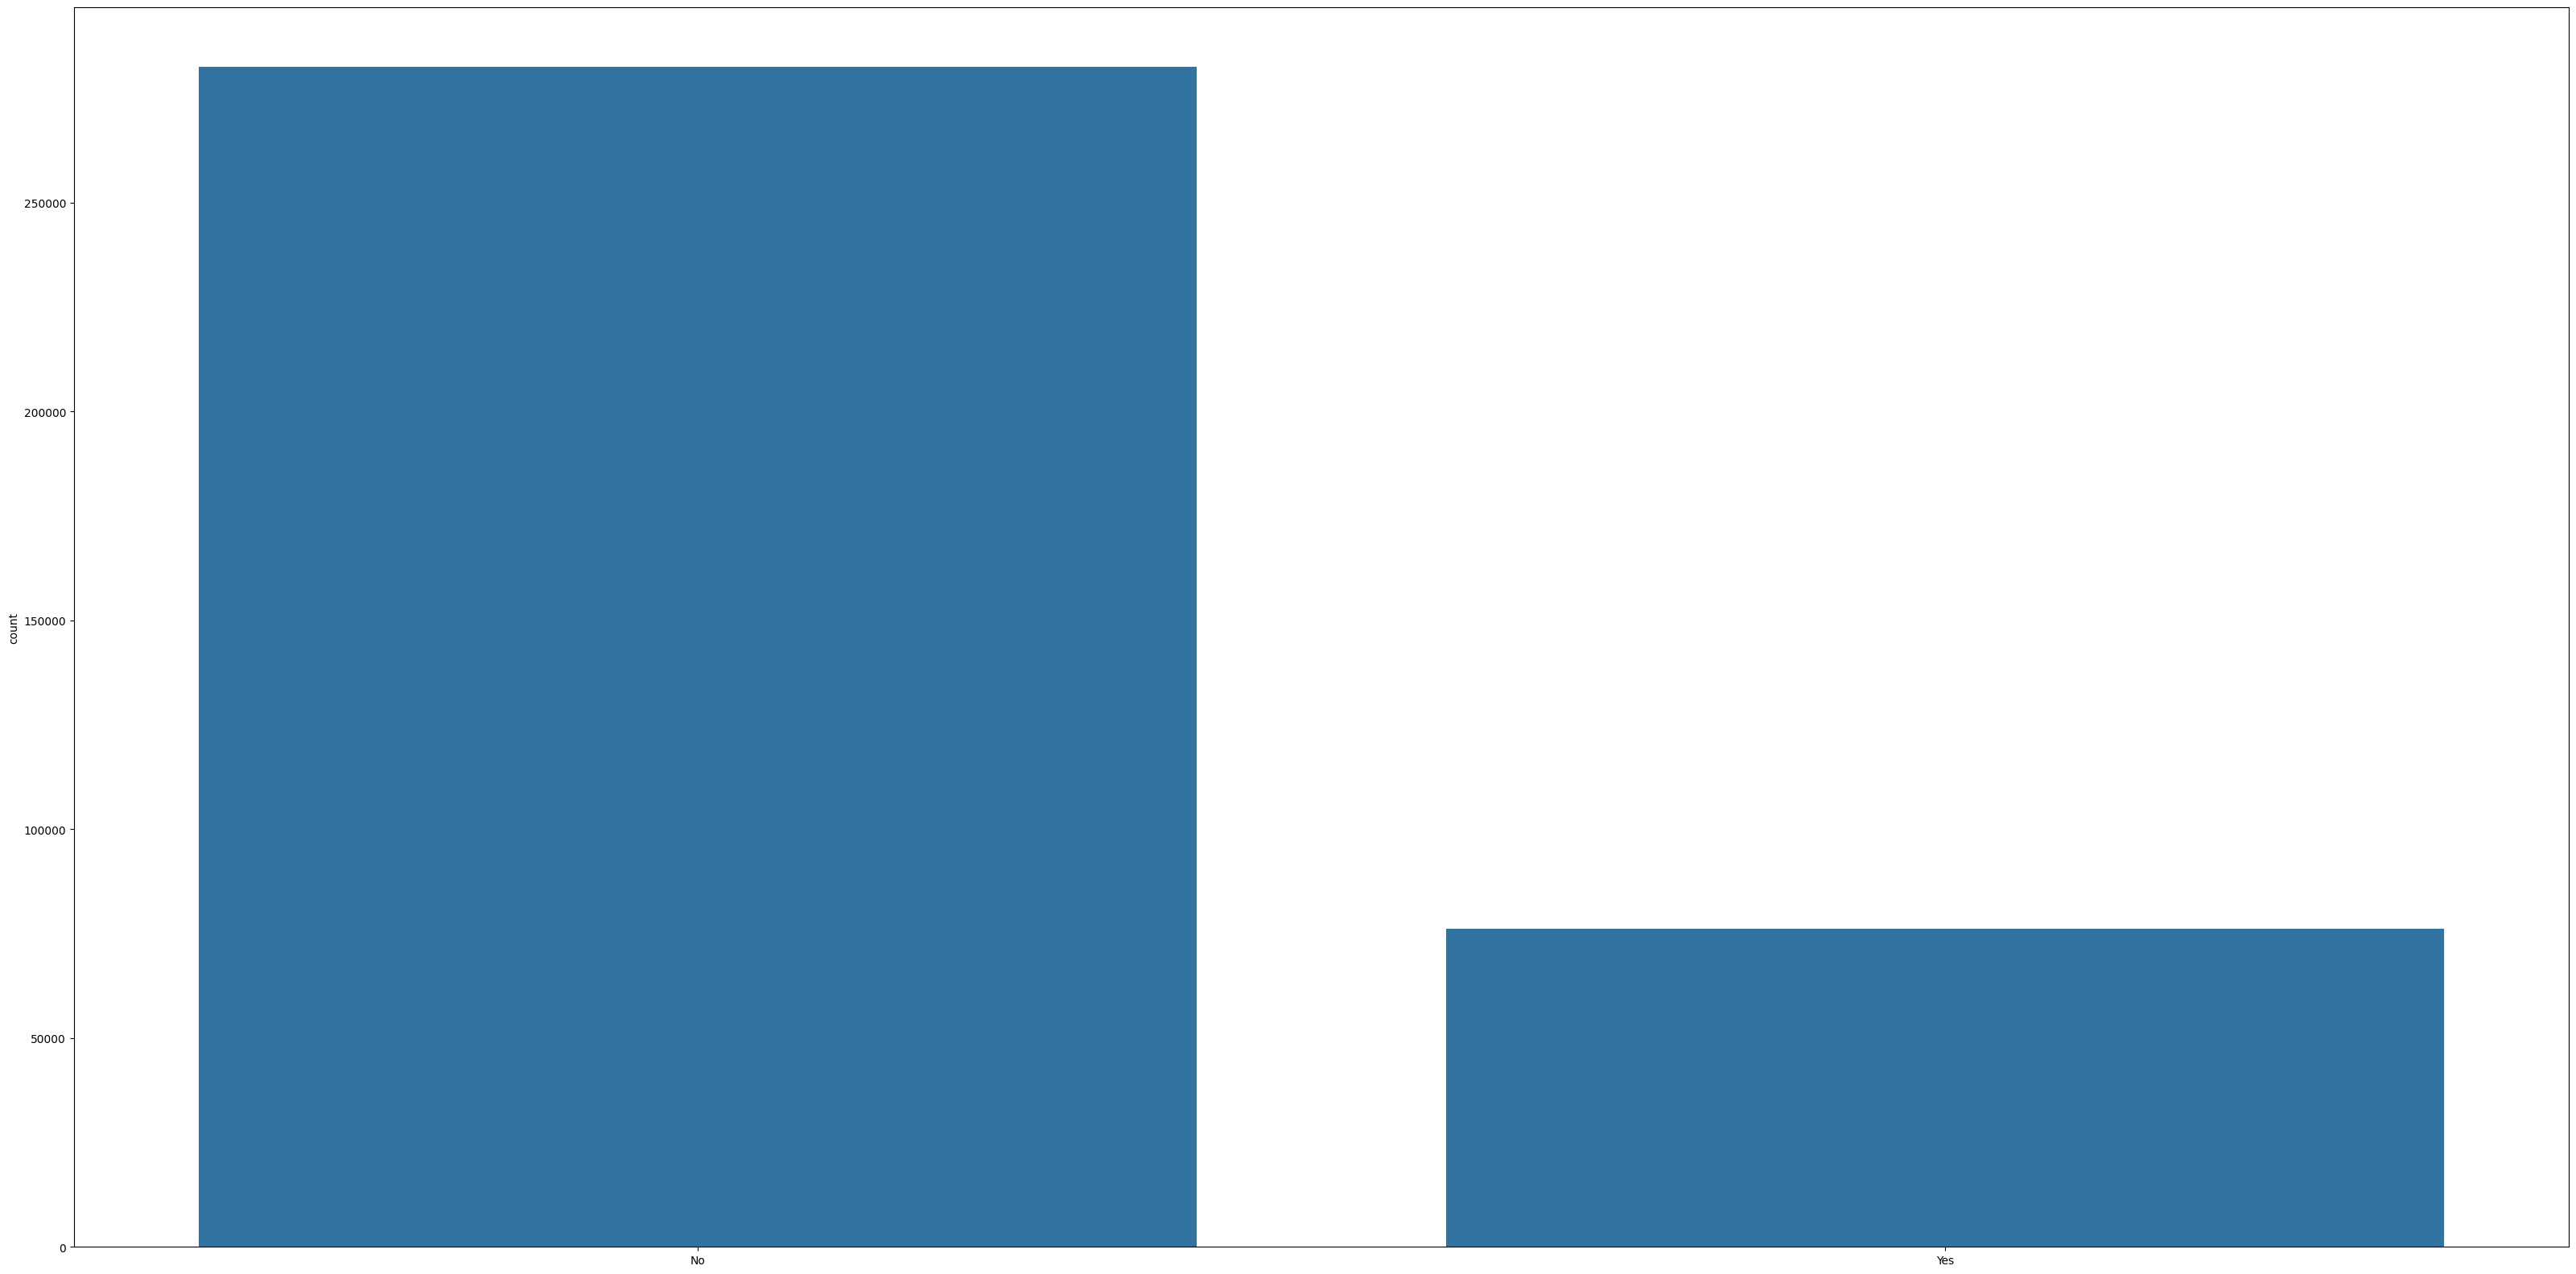

In [31]:
plt.figure(figsize=(40,20))
sns.barplot(y=consumer_train['Consumer disputed?'].value_counts(),x=consumer_train['Consumer disputed?'].unique(),)
disputed_counts=disputed_cons.value_counts()


Plot bar graph for the total no of disputes products-wise with help of seaborn

<Axes: xlabel='Product'>

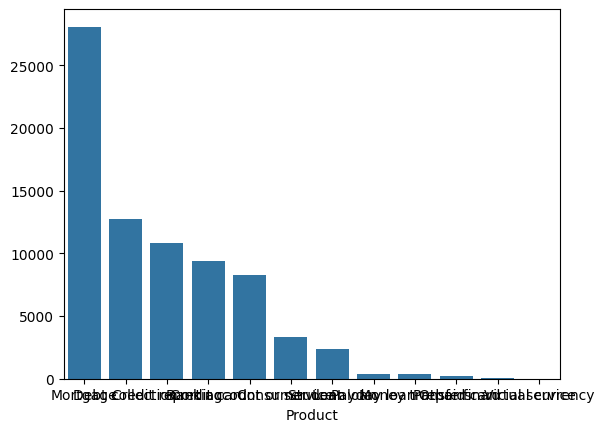

In [32]:
sns.barplot(x=disputed_cons.Product.value_counts().index,y=disputed_cons.Product.value_counts().values)


Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

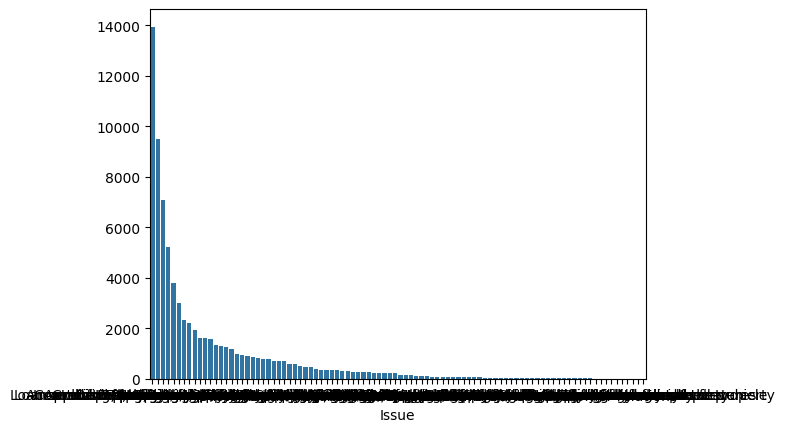

Issue
Loan modification,collection,foreclosure    13937
Loan servicing, payments, escrow account     9503
Incorrect information on credit report       7063
Cont'd attempts collect debt not owed        5223
Account opening, closing, or management      3804
                                            ...  
Overdraft, savings or rewards features          4
Lost or stolen money order                      4
Lender repossessed or sold the vehicle          3
Lender damaged or destroyed property            1
Lender sold the property                        1
Name: count, Length: 94, dtype: int64


In [33]:
disputed_cons.Issue.value_counts()
sns.barplot(x=disputed_cons.Issue.value_counts().index,y=disputed_cons.Issue.value_counts().values)

plt.show()

print(disputed_cons.Issue.value_counts())

Plot bar graph for the total no of disputes by State with Maximum Disputes

<Axes: xlabel='State'>

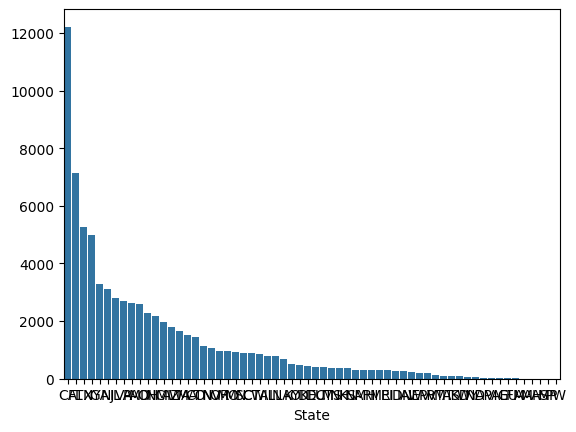

In [34]:
sns.barplot(x=disputed_cons.State.value_counts().index,y=disputed_cons.State.value_counts().values)

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

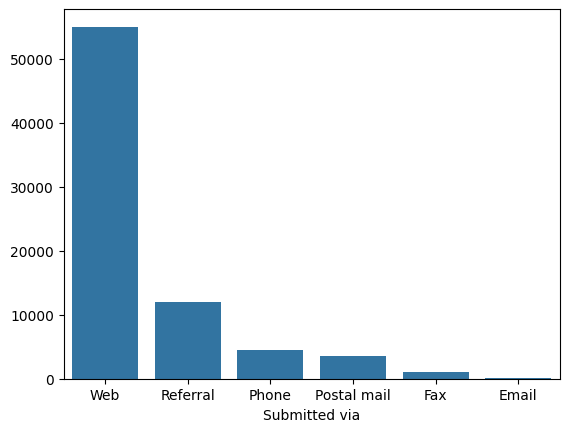

Submitted via
Web            55001
Referral       12066
Phone           4456
Postal mail     3497
Fax             1117
Email             35
Name: count, dtype: int64

In [35]:
sns.barplot(x=disputed_cons['Submitted via'].value_counts().index,y=disputed_cons['Submitted via'].value_counts().values)
plt.show()
disputed_cons['Submitted via'].value_counts()

In [36]:
consumer_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days Held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,1
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,1
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,1
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,1


Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

<Axes: xlabel='Timely Response', ylabel='Dispute Count'>

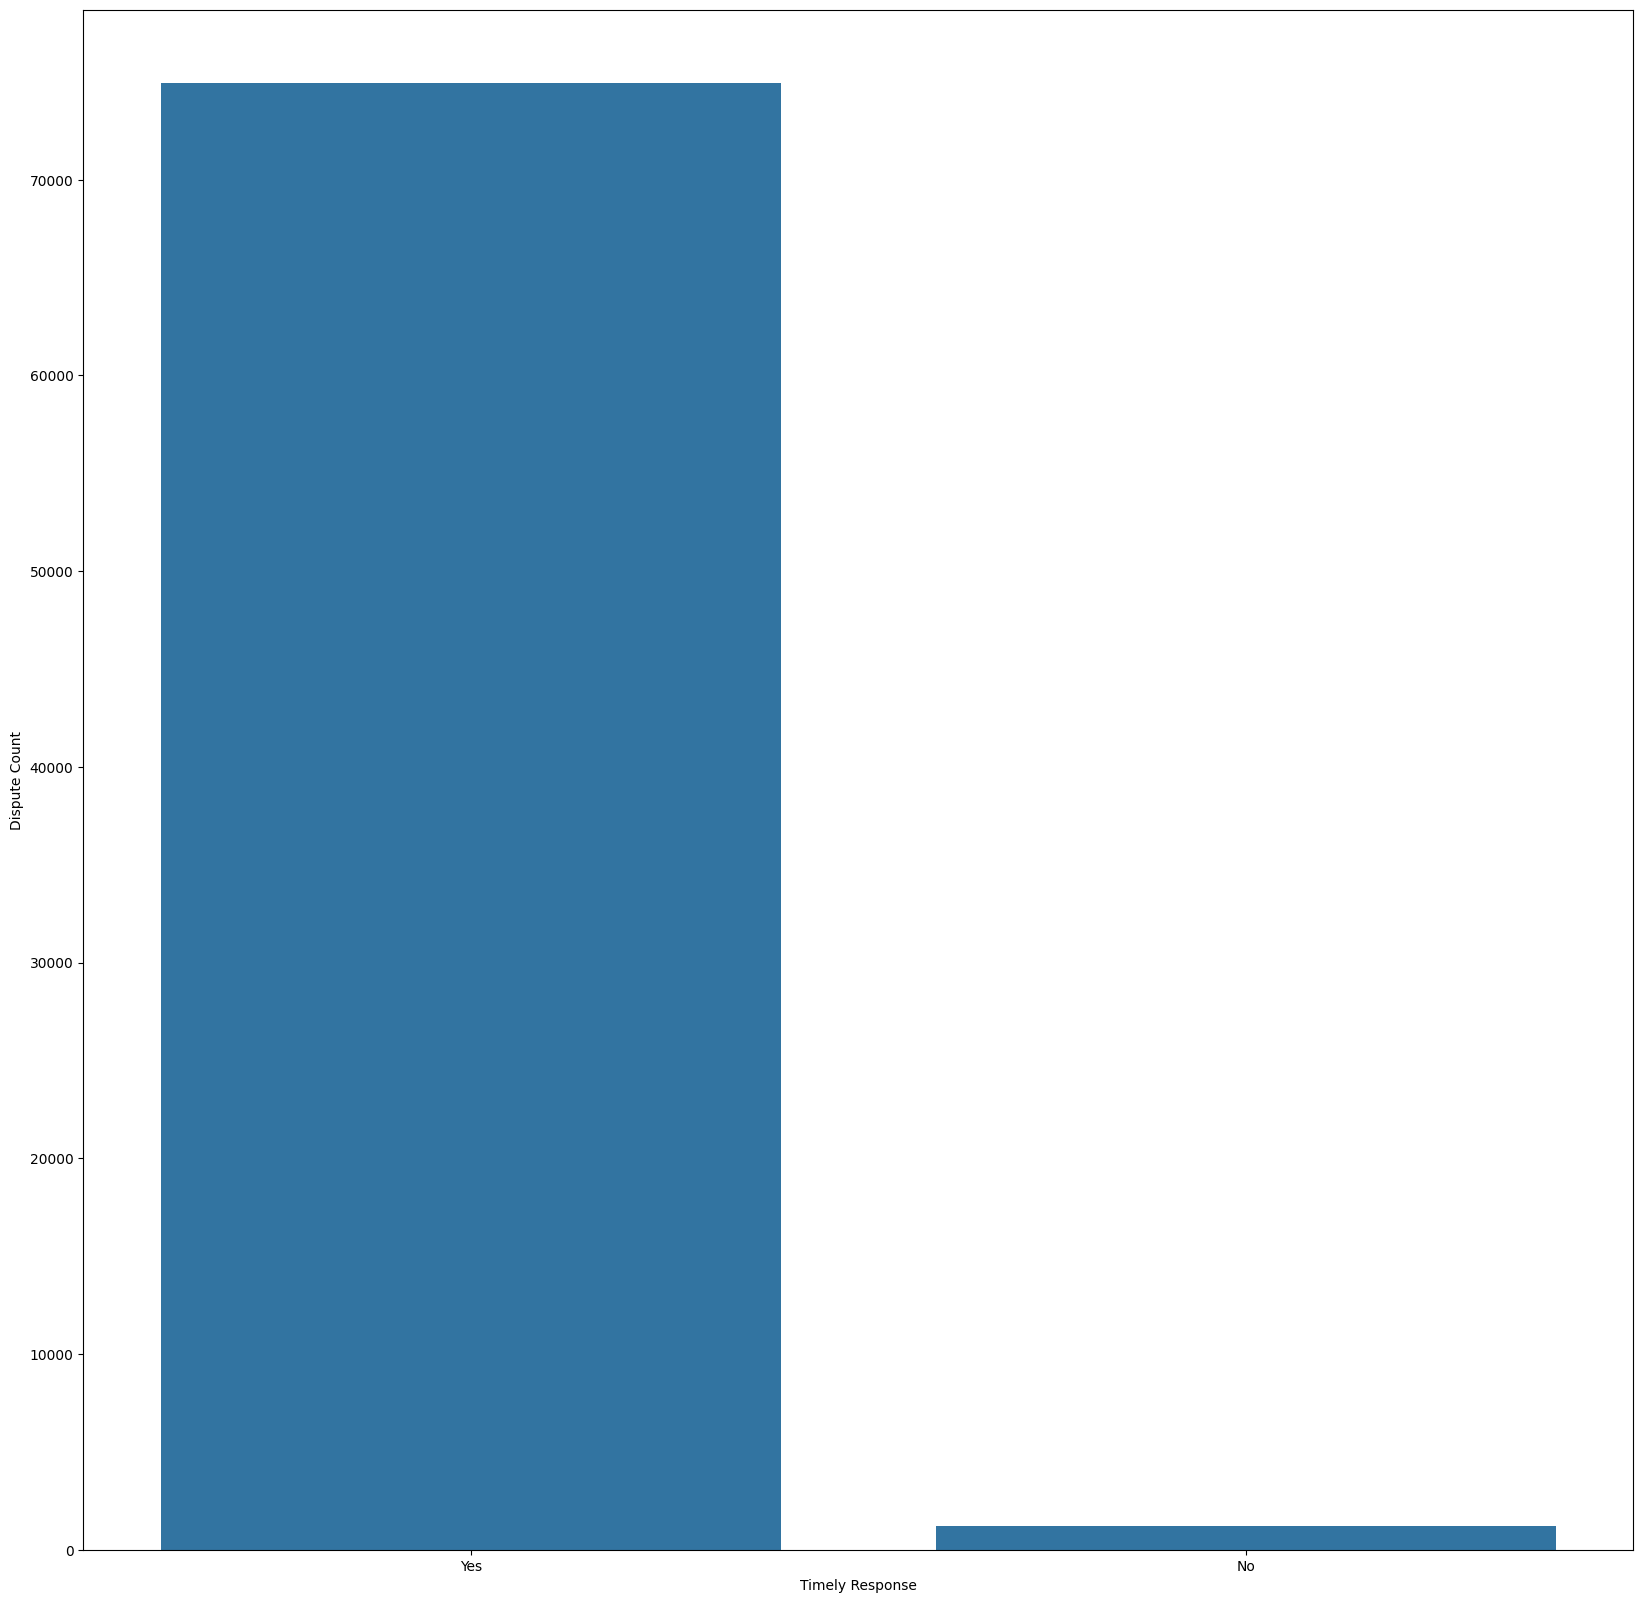

In [37]:
plt.figure(figsize=(20,20))
plt.xlabel("Timely Response")
plt.ylabel("Dispute Count")

sns.barplot(x=disputed_cons['Timely response?'].value_counts().index,y=disputed_cons['Timely response?'].value_counts().values)

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

<Axes: xlabel='Company response to consumer', ylabel='Dispute Count'>

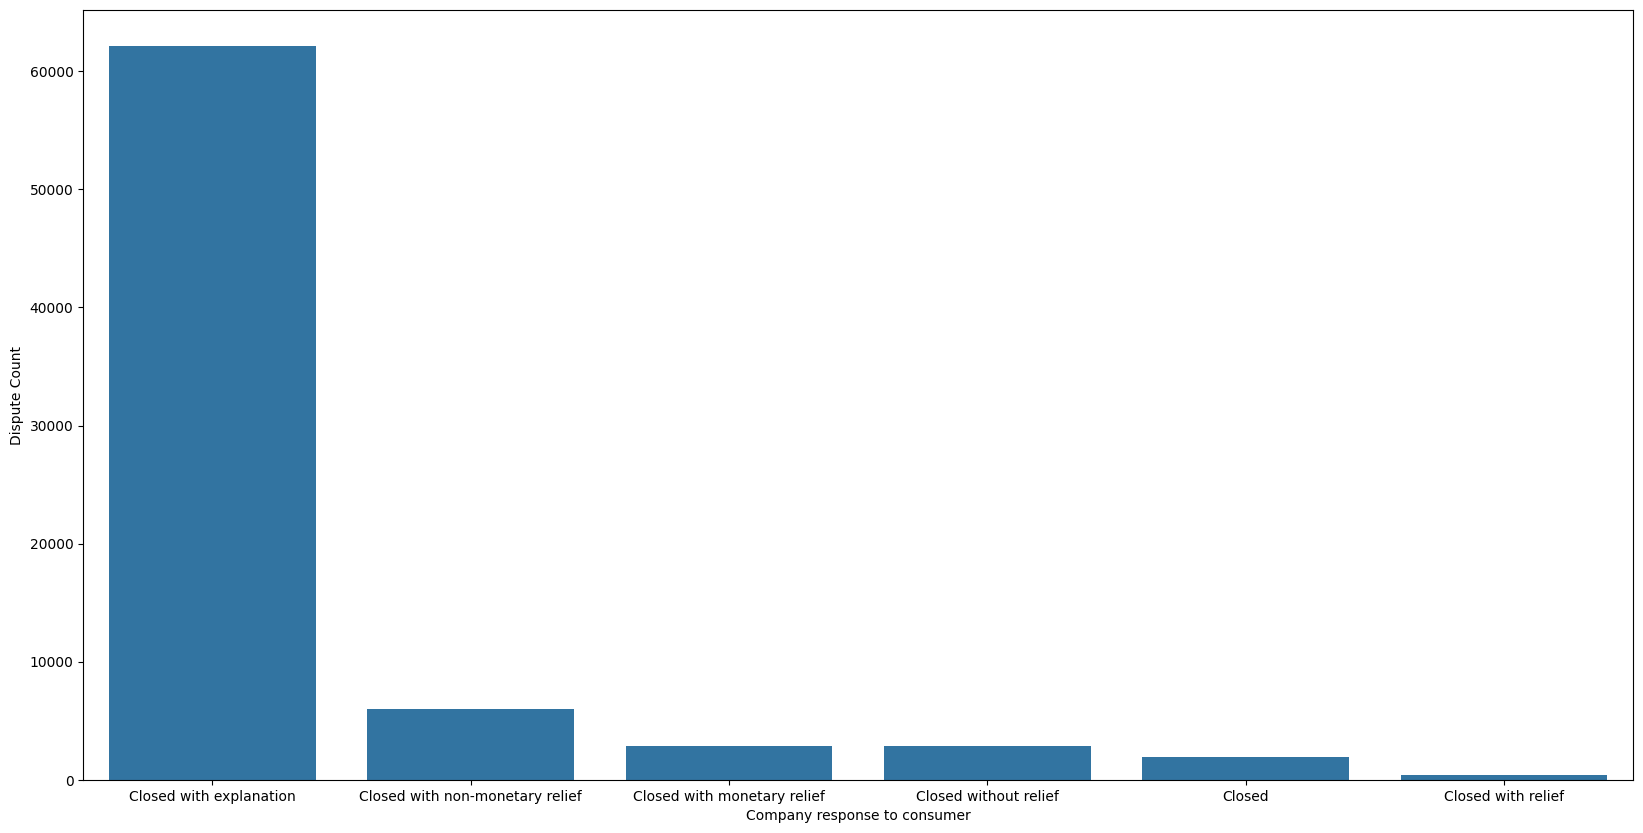

In [38]:
plt.figure(figsize=(20,10))
plt.ylabel("Dispute Count")

sns.barplot(x=disputed_cons['Company response to consumer'].value_counts().index,y=disputed_cons['Company response to consumer'].value_counts().values)

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

<Axes: >

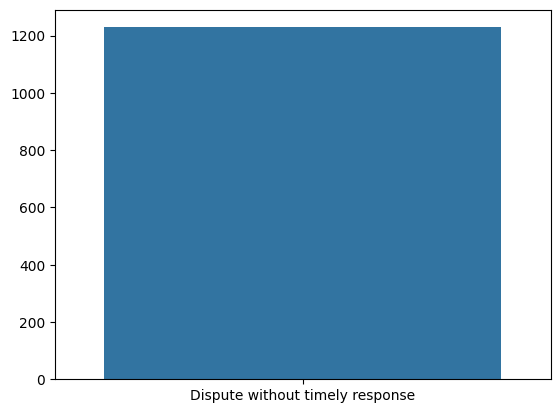

In [39]:
no_timely=disputed_cons[disputed_cons['Timely response?']=="No"]
sns.barplot(x=['Dispute without timely response'],y=[no_timely.shape[0]])
# no_timely.plot(kind='bar',color='green')

Plot bar graph for the total no of disputes over Year Wise Complaints

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Days Held,Week Received
Year,,,,,,,,,,,,
2011,346,346,346,346,346,346,346,346,346,346,346,346
2012,9830,9830,9830,9830,9830,9830,9830,9830,9830,9830,9830,9830
2013,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615
2014,17814,17814,17814,17814,17814,17814,17814,17814,17814,17814,17814,17814
2015,20580,20580,20580,20580,20580,20580,20580,20580,20580,20580,20580,20580
2016,13987,13987,13987,13987,13987,13987,13987,13987,13987,13987,13987,13987


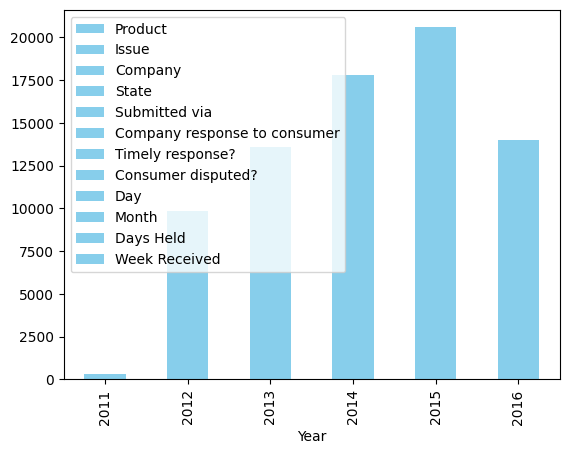

In [40]:
dispute_by_year=disputed_cons.groupby('Year').count()
years=[]
dispute_by_year=pd.DataFrame(dispute_by_year)
years=dispute_by_year.index.get_level_values(0).tolist()
years
dispute_by_year.plot(kind='bar',color='skyblue')
dispute_by_year

In [41]:
co=disputed_cons[disputed_cons["Year"]==2011].count()
co

Product                         346
Issue                           346
Company                         346
State                           346
Submitted via                   346
Company response to consumer    346
Timely response?                346
Consumer disputed?              346
Day                             346
Month                           346
Year                            346
Days Held                       346
Week Received                   346
dtype: int64

Plot bar graph for the total no of disputes over Year Wise Disputes

Text(0, 0.5, 'Count of Disputes')

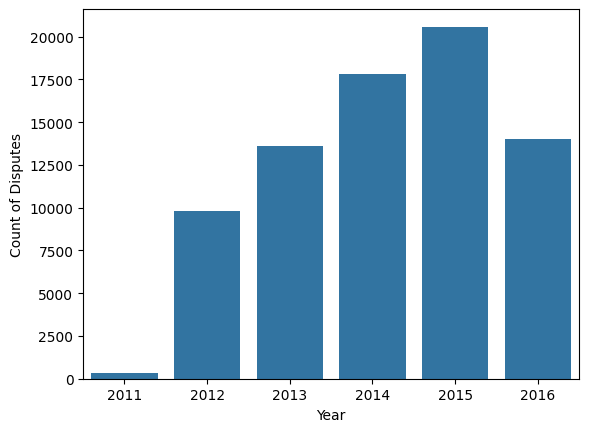

In [42]:
sns.barplot(x=disputed_cons.Year.value_counts().index,y=disputed_cons.Year.value_counts().values)
plt.ylabel("Count of Disputes")

Plot  bar graph for the top companies with highest complaints

<Axes: xlabel='Company'>

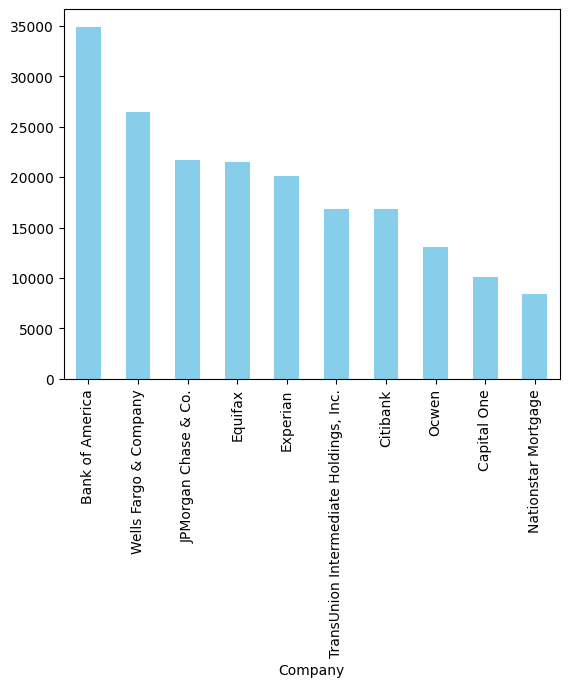

In [43]:
company=consumer_train.Company.value_counts().head(10)
company.plot(kind='bar',color='skyblue')

"Days Held" Column Analysis(describe)

In [44]:
consumer_train['Days Held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days Held, dtype: float64

Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [45]:
consumer_train['Days Held']=[0 if days <0  else days for days in consumer_train['Days Held']]

consumer_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days Held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0,1
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0,1
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14,1
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0,1


In [46]:
consumer_test['Days Held']=[0 if days <0  else days for days in consumer_test['Days Held']]
consumer_test.head()


,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days Held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0,1
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0,1
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3,1
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0,1


Drop Days Held with Negative Values

In [47]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text pre-processing
(It will be cover in upcoming calsses)

In [48]:
import string

relevant_text_train = consumer_train['Issue']
relevant_text_test = consumer_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [49]:
consumer_train['Issues_cleaned'] = clean_data_train
consumer_test['Issues_cleaned'] = clean_data_test



consumer_train = consumer_train.drop('Issue', axis = 
                                     1)
consumer_test = consumer_test.drop('Issue', axis = 1)


Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [50]:
consumer_train=consumer_train.drop(["Company","State","Year","Days Held"],axis=1)
consumer_test=consumer_test.drop(["Company","State","Year","Days Held"],axis=1)


Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [51]:
lc=LabelEncoder()
consumer_train['Consumer disputed?']=lc.fit_transform(consumer_train['Consumer disputed?'])


Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [52]:

cat_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']


dummy_variables = pd.get_dummies(consumer_train[cat_columns])





In [53]:

cat_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']


dummy_variables_test = pd.get_dummies(consumer_test[cat_columns])





Concate Dummy Variables and Drop the Original Columns

In [54]:
consumer_train_dummies = pd.concat([consumer_train, dummy_variables], axis=1)


consumer_train_dummies.drop(columns=cat_columns, inplace=True)
consumer_train_dummies.head()


,Consumer disputed?,Day,Month,Week Received,Issues_cleaned,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,0,14,10,1,incorrect inform on credit report,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True
1,1,26,4,1,deposit and withdraw,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,0,20,12,1,other,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,0,3,3,1,disclosur verif of debt,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
4,1,30,1,1,disclosur verif of debt,False,False,False,False,True,...,False,True,False,True,False,False,False,False,False,True


In [56]:
consumer_test_dummies = pd.concat([consumer_test, dummy_variables], axis=1)


consumer_test_dummies.drop(columns=cat_columns, inplace=True)
consumer_test_dummies.head()


,Day,Month,Week Received,Issues_cleaned,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,17.0,1.0,1,custom servic custom relat,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
1,22.0,6.0,1,payment to acct not credit,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,4.0,9.0,1,credit line increas decreas,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,17.0,5.0,1,problem when you be unabl to pay,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
4,7.0,7.0,1,improp contact or share of info,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True


Calculating TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(consumer_train_dummies['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(consumer_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


Replacing Issues_cleaned by Vectorized Issues

In [58]:
consumer_train_dummies = consumer_train_dummies.drop('Issues_cleaned', axis = 1)
consumer_test_dummies = consumer_test_dummies.drop('Issues_cleaned', axis = 1)
consumer_train_dummies = pd.concat([consumer_train_dummies, issues_train], axis = 1)
consumer_test_dummies = pd.concat([consumer_test_dummies, issues_test], axis = 1)
Feature168 = [0] * 119606
consumer_test['Feature168'] = Feature168

observe train and test datasets

In [ ]:
# df_train.head()
# df_test.head()

Observe Shape of new Train and Test Datasets

In [59]:
consumer_train_dummies.shape
consumer_train_dummies.head()


,Consumer disputed?,Day,Month,Week Received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,14,10,1,False,False,False,True,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,26,4,1,True,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,20,12,1,False,False,True,False,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,3,1,False,False,False,False,True,False,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,1,1,False,False,False,False,True,False,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [60]:
X=consumer_train_dummies.drop(columns=["Consumer disputed?"])
# y=consumer_train_with_dummies['Consumer disputed?']

scaler=StandardScaler()
# y.head()


Do feature selection with help of PCA

In [61]:
pca=PCA()
X_scaled=scaler.fit_transform(X)

X_pca=pca.fit_transform(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var>= 0.8) 



Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [62]:
selected_features=X_pca[:,:n_components]

selected_df = pd.DataFrame(selected_features, columns=[f'Feature_{i}' for i in range(n_components)])
selected_df


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52
0,5.417890,-2.199188,-1.153126,0.607238,-0.448639,-1.048570,-0.109935,-0.559588,0.296628,0.190465,...,-0.009565,-0.217689,-0.117212,0.670415,0.041041,-0.564623,0.315142,-0.843604,0.331436,0.045718
1,-0.188978,1.010899,-0.115557,-2.081885,-1.108766,-0.417749,-2.280890,0.731995,-0.705146,-0.169073,...,0.036757,-0.069266,-0.146369,0.606394,-0.269540,-0.453150,0.438372,-1.910482,0.706527,0.049148
2,0.166616,0.015038,-0.019460,-0.807063,-0.289356,0.224147,-0.534056,0.909280,-0.160978,-0.712191,...,-0.014171,0.002617,0.616008,-1.173857,1.785466,0.917148,-1.325645,2.017096,-1.009722,0.308409
3,-0.842906,-1.076112,3.470233,-0.475550,-0.660051,0.140619,1.120836,-0.180211,-1.053732,0.349068,...,-0.019297,0.065809,-0.102434,0.067107,0.207390,-0.135405,-0.364008,1.347568,-0.457002,0.111593
4,-0.536488,-1.260155,3.853201,-0.516635,-0.458358,0.285872,1.545972,-0.098419,-1.021882,0.621310,...,0.002611,0.013441,-0.096000,0.109031,-0.152873,-0.108267,0.185732,-0.899208,0.228646,-0.014046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,5.836305,-2.274970,-1.050991,0.584538,-0.564751,-1.030123,-0.224609,-0.560290,0.262503,0.125407,...,-0.020472,0.018197,0.165520,-1.618525,-0.721788,1.435396,-0.095448,-0.768714,0.079379,-0.281649
358806,-2.180954,-0.508769,-1.745877,2.498985,0.069768,-0.556070,-0.504323,0.109939,0.260475,-2.073634,...,-0.018771,0.242652,0.191127,-2.036837,-0.583064,1.717596,-0.529955,0.884769,-0.438092,-0.248889
358807,-0.164183,-0.014648,0.097998,-0.886241,-0.171967,0.099138,-0.486213,1.715371,-0.458832,-0.777195,...,0.034430,0.011382,0.240077,-1.812179,0.676763,1.215677,-1.322605,0.210390,0.143529,0.825225
358808,-1.508931,-2.239698,6.540893,1.711658,-1.743711,0.316125,-1.416295,-0.955233,0.465212,0.521131,...,-0.064774,0.073897,0.209479,-1.636657,-0.342934,1.453097,-0.580495,2.052261,-0.952777,-0.135052


Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [63]:
X=selected_df
y=consumer_train_dummies['Consumer disputed?']


y=lc.fit_transform(original_train['Consumer disputed?'])

# # original_test.head()




Split data into Train and Test datasets
(for test data use test excel file data)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=43)
# X_test=original_test
# y_test=y
X_test=consumer_test_dummies


Shapes of the datasets

In [66]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape
# y_val


((287048, 53), (71762, 53), (287048,), (71762,), (358810, 196))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    
    if (name=="K-Nearest Neighbors") :
#         yknn_train=y_val.ravel()
#         yknn_val=y_val.ravel()
        Xknn_train=X_train.values
        Xknn_val=X_val.values
        yknn_train=y_train
        yknn_val=y_val
        
        model.fit(Xknn_train, yknn_train)
        y_val_pred=model.predict(Xknn_val)
        val_accuracy=accuracy_score(yknn_val,y_val_pred)
        results[name] = {'Validation Accuracy': val_accuracy}
        
    
    else:
        model.fit(X_train, y_train)
    
    # Predictions on validation set
        y_val_pred = model.predict(X_val)
    
    # Measure validation accuracy
        val_accuracy = accuracy_score(y_val, y_val_pred)
    
#     # Predictions on test set
#     y_test_pred = model.predict(X_test)
    
#     # Measure test accuracy
#     test_accuracy = accuracy_score(y_test, y_test_pred)
    
        results[name] = {'Validation Accuracy': val_accuracy}
            
        
        
    


# Display results
for name, result in results.items():
    print(f'Model: {name}')
    print(f'Validation Accuracy: {result["Validation Accuracy"]:.4f}')
#     print(f'Test Accuracy: {result["Test Accuracy"]:.4f}')
    print()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Logistic Regression
Validation Accuracy: 0.7873

Model: Decision Tree
Validation Accuracy: 0.7543

Model: Random Forest
Validation Accuracy: 0.7561

Model: AdaBoost
Validation Accuracy: 0.7873

Model: Gradient Boosting
Validation Accuracy: 0.7873

Model: K-Nearest Neighbors
Validation Accuracy: 0.7485

Model: XGBoost
Validation Accuracy: 0.7870



Final Model and Prediction for test data file

In [68]:
consumer_train_dummies.head()
# X_test=consumer_test_dummies

,Consumer disputed?,Day,Month,Week Received,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,14,10,1,False,False,False,True,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,26,4,1,True,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,20,12,1,False,False,True,False,False,False,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,3,1,False,False,False,False,True,False,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,30,1,1,False,False,False,False,True,False,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [69]:
test_X=consumer_test_dummies
# y=consumer_train_with_dummies['Consumer disputed?']
sm=SimpleImputer()

# test_X=sm.fit_transform(test_X)
# scaler=StandardScaler()
# y.head()
# consumer_test_dummies.head()
# test_X_
# consumer_test_dummies.tail()
# test_X['Day']=test_X['Day'].astype(int)
# test_X['Month']=test_X['Month'].astype(int)
# test_X['Week Received']=test_X['Week Received'].astype(int)
test_X=test_X.dropna(axis=0)
col=test_X.columns[test_X.isnull().any()]
col
test_X.isnull().any()


Day                                False
Month                              False
Week Received                      False
Product_Bank account or service    False
Product_Consumer Loan              False
                                   ...  
Feature163                         False
Feature164                         False
Feature165                         False
Feature166                         False
Feature167                         False
Length: 196, dtype: bool

In [76]:
pca=PCA()
test_X_scaled=scaler.fit_transform(test_X)

test_X_pca=pca.fit_transform(test_X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var>= 0.8) 

n_components


59

In [79]:
selected_features_test=test_X_pca[:,:n_components]

selected_df_test = pd.DataFrame(selected_features_test, columns=[f'Feature_{i}' for i in range(n_components)])
selected_df_test


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58
0,-0.263141,-0.111109,-0.618356,-0.135839,0.078884,-0.038434,0.100209,0.304563,-0.167453,-0.424815,...,-0.809801,-0.081675,-0.006500,0.256815,-0.362428,-0.529646,0.750211,-0.058379,-0.050597,0.506633
1,1.176077,0.415214,1.116973,-0.295076,2.340520,2.143567,-0.459971,0.826914,-0.324345,0.683843,...,-0.153055,-10.773787,-2.752478,-0.705329,-1.840224,-0.165245,-0.041789,0.411622,0.265762,1.062088
2,-0.142727,1.160771,0.076968,0.083671,-0.415380,0.299393,0.272672,-0.116243,0.271521,0.577459,...,0.023549,-0.393157,0.913953,0.160118,-1.150139,0.242457,-0.154652,-0.528816,0.366600,-2.982410
3,12.661906,-0.300002,1.447565,-0.470208,9.560465,7.381405,-0.309665,-0.967782,-0.069196,-0.669392,...,-0.203132,-0.084014,0.106640,0.023269,-0.790271,0.507216,-1.279804,-0.344204,-0.080756,0.023463
4,-0.318653,-0.020388,-0.795039,0.881862,-5.888542,6.180021,-0.755188,-4.547838,7.888503,-7.342234,...,0.585318,-0.111958,0.080716,0.007412,-0.420750,0.677469,-1.020381,-0.172861,-0.280346,0.103570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,-0.061176,1.140565,0.232704,-0.026245,-0.068658,-0.091026,0.089259,-0.006523,0.050660,0.120360,...,1.374038,-0.044882,0.240890,-0.374529,-1.119153,0.439922,-0.549849,1.294725,1.169039,1.849146
119602,-0.128688,0.073252,-0.105392,0.109953,-0.160821,0.192734,0.448268,-0.012257,0.228694,0.453997,...,0.092553,-0.661001,-0.507963,0.027562,0.289546,1.746967,-3.771771,-0.609571,-0.340919,-0.291296
119603,-0.874704,-1.472472,-0.327155,-0.776394,1.707865,-2.021508,0.443990,-2.068794,1.587265,0.882480,...,-0.615397,0.078382,-0.176931,-0.010269,0.811746,0.014588,-0.151275,-0.081591,-0.075250,0.390490
119604,0.019558,5.261822,1.503230,-0.377542,-0.415773,-1.436800,-0.664722,0.279390,-0.509501,-0.307050,...,0.619913,-0.098312,0.068491,0.042889,-0.462330,0.530042,-1.063002,-0.256083,-0.139456,-0.217382


In [80]:
test_XX=selected_df_test

In [82]:
ada=AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=50)




ada.fit(X_train, y_train)
X_test=consumer_test_dummies

# Evaluate the model on the validation set
# accuracy = adaboost.score(X_val, y_val)
# print("Validation Accuracy:", accuracy)



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [84]:
# y_pred=ada.predict(test_XX)
test_XX.drop(["Feature_58","Feature_53","Feature_54","Feature_55","Feature_56","Feature_57"],axis=1,inplace=True)
test_XX.head()
y_pred=ada.predict(test_XX)


Export Predictions to CSV

In [88]:
original_test['Consumer disputed?']=y_pred
original_test.to_csv()

Value: 0, Count: 118686
Value: 1, Count: 920


In [98]:
Test_data_final=pd.read_csv("Consumer_Complaints_test.csv")
Test_data_final['Consumer_disputed?']=y_pred
Test_data_final.head()
Test_data_final['Consumer_disputed?']=["Yes" if value==1 else "No" for value in Test_data_final['Consumer_disputed?']]
Test_data_final.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer_disputed?
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133,No
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989,Yes
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090,No
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,No
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667,No


In [97]:
Test_data_final.to_csv("Test_final_data.csv",index=False)